# Point and line light souces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.display import Image

## Preliminary considerations

To describe the light distribution of a point source, we need the luminous intensity, which is defined as follows

Luminous intensity $I(\theta, \phi) = \frac{d\phi}{d\Omega}$, $[ I ]$ = lm/sr = cd (candela)

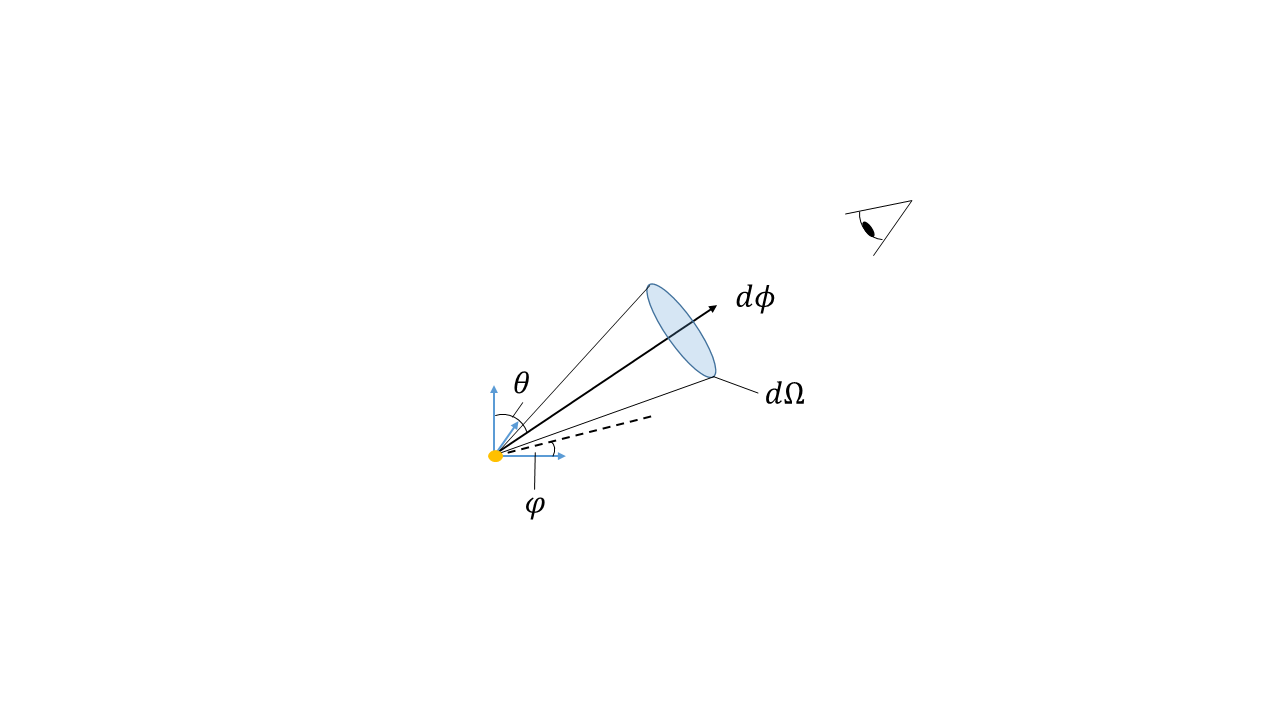

In [2]:
Image("PointSources.png")

In [3]:
## Point source

```{admonition} Questions
:class: full-width
Now let's look at a dot-shaped ceiling luminaire that emits light homogeneously into the lower half-space.

What does the radiation characteristic look like in a polar diagram?

The sketch below shows a point source on the ceiling. 

Complete the sketch with the necessary designations and show that the following illuminance distribution results in the room

$$
    E(x, y) = \frac{\phi_{total}}{2 \pi} \frac{\text{cos} (\theta_2)}{R^3}
$$

What results for $R$ and cos($\theta_2$) depending on the coordinates?
```

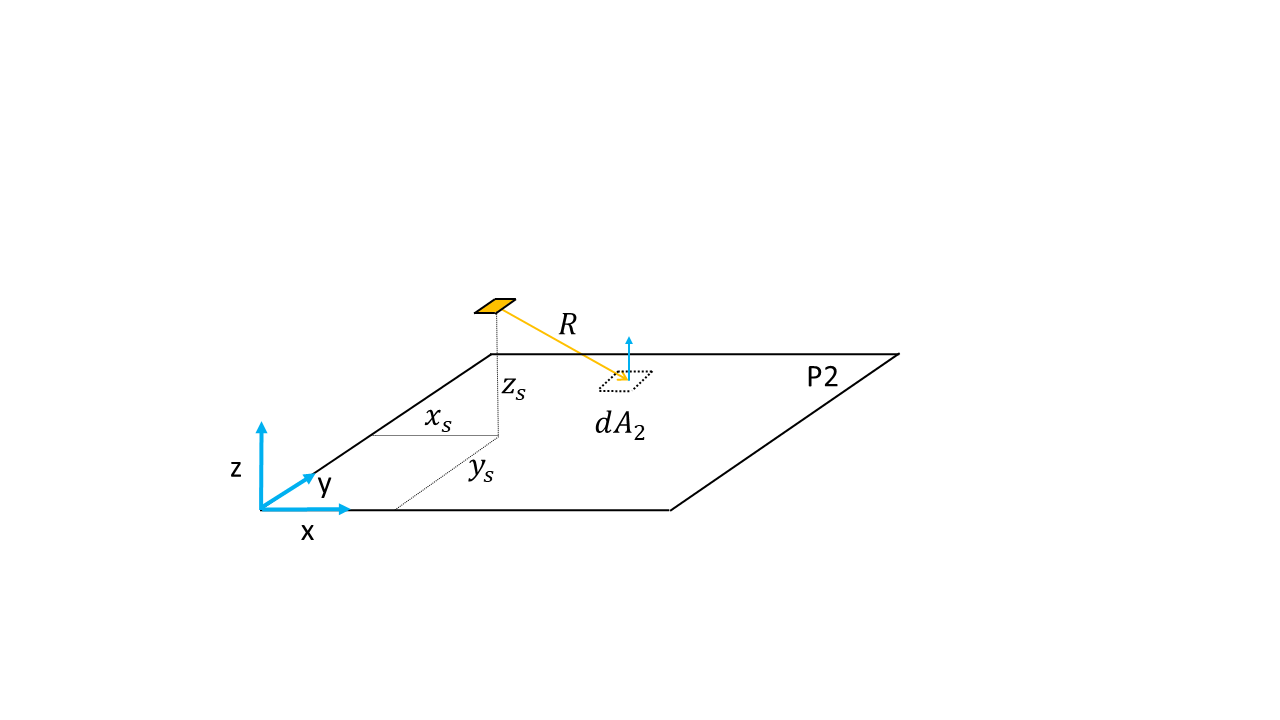

In [4]:
Image("PointSourcePlane.png")

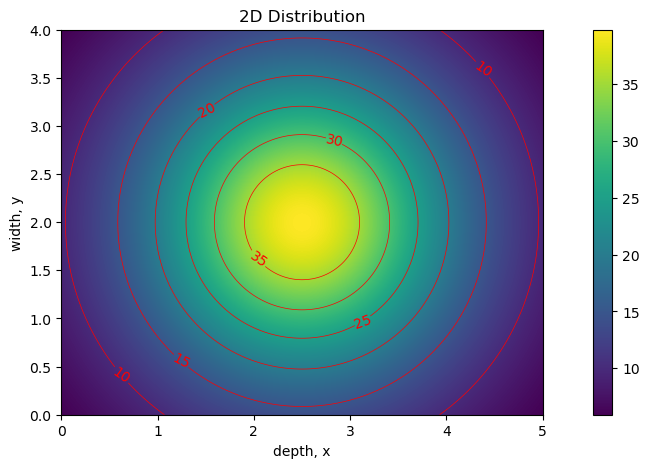

In [5]:
# Point source illumination intensity

def E_ps(x2, y2, xs, ys, h, phi_tot): # point source half-space spotlight
    E = phi_tot / 2 / np.pi * h / ((x2 - xs)**2 + (y2 - ys)**2 + h**2)**(3/2)
    return E

ax = 5 # depth
by = 4 # width
h  = 2 # height above working plane

Nx, Ny = (int(100*ax), int(100*by))
x2 = np.linspace(0, ax, Nx)
y2 = np.linspace(0, by, Ny)

res_2D_p = np.zeros((Ny, Nx))
for nx, xx in enumerate(x2):
    for ny, yy in enumerate(y2):
        res_2D_p[ny, nx] = E_ps(xx, yy, xs=2.5, ys=2, h=h, phi_tot=1000)

fig = plt.figure(figsize=(13, 5))
plt.imshow(res_2D_p, extent = [0, ax, 0, by], interpolation='bilinear', aspect='1', origin='lower')
plt.colorbar()
X, Y = np.meshgrid(x2, y2)
#levels = np.arange(0, 0.9, 0.2)
CS = plt.contour(X, Y, res_2D_p, colors='r', linewidths=0.5)#, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('2D Distribution')
plt.ylabel('width, y')
plt.xlabel('depth, x')
plt.show()

In [6]:
np.sum(res_2D_p) * ax / Nx * by / Ny

371.5706548902139

In [7]:
2 * 4 * 2 + 2 * 5 * 2, 4*5, 20 / 36 * 1000

(36, 20, 555.5555555555555)

## Line souces

In this section we look at a line source. A line source is a light source where one dimension (its width) is much smaller than its length and much smaller than the smallest dimension of a room in which it is placed. 

In order to calculate the illuminance distribution of these in the room, we think of them as being made up of many point sources. After integrating all the point light sources on the line, we obtain

$$
    E_{ls}(x_2, y_2) = \frac{d^2 \phi_{ls}}{dl\, d\Omega} \, \frac{(y-y_2)\, h}{((x_2 - x_s)^2 + h^2) \sqrt{(x_2 - x_s)^2 + (y-y_2)^2 + h^2}} \mathop{\bigg|}_{y=y_u}^{y=y_o}
$$

$\frac{d^2 \phi_{ls}}{dl\, d\Omega}$ is the length-specific luminous intensity, $x_s$ is the position of the line source, $h$ their height above the working plane and $y_u$, $y_o$ the positions their ends.

```{admonition} Question
:class: full-width
Now look at a line light source at the ceiling in the following sketch.

Derive the above illuminance distribution $E_{ls}$
```

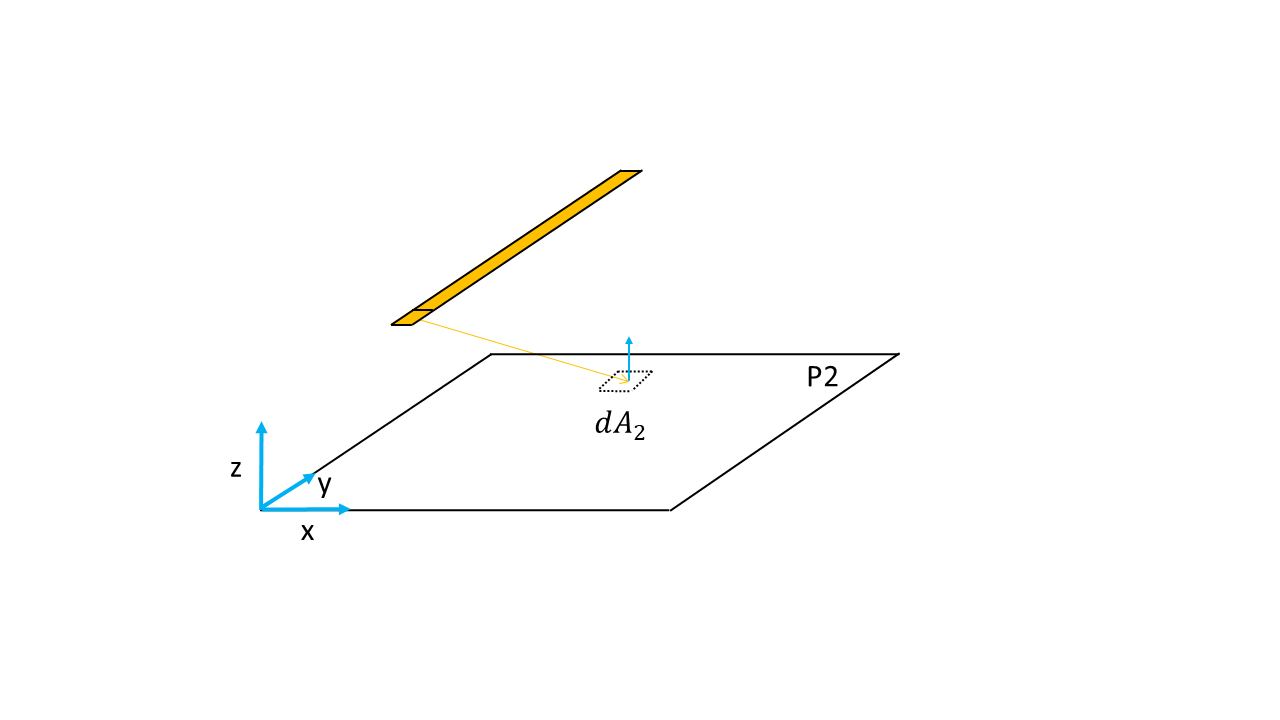

In [8]:
Image("LineSources.png")

## Results linesource

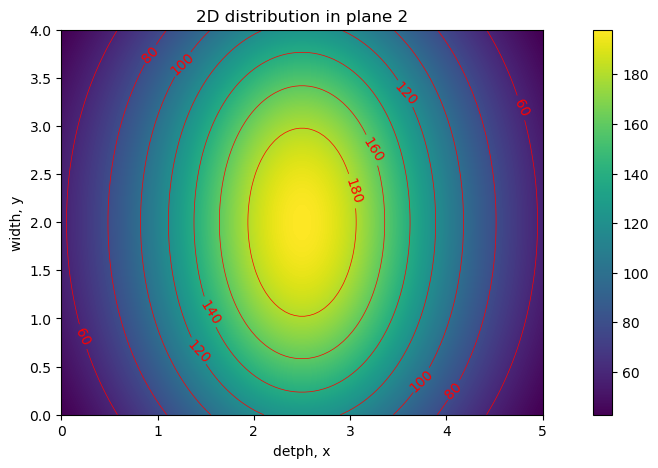

In [9]:
# Line source illumination intensity

def E_ls(x2, y2, xs, yu, yo, h, phi_tot_l): # line source 
    # phi_tot_l: luminous intensity per length 
    part_o = (yo - y2) / (((x2 - xs)**2 + h**2) * ((x2 - xs)**2 + (yo-y2)**2 + h**2)**0.5)
    part_u = (yu - y2) / (((x2 - xs)**2 + h**2) * ((x2 - xs)**2 + (yu-y2)**2 + h**2)**0.5)
    E = phi_tot_l / 2 / np.pi * h * (part_o - part_u)
    return E

ax = 5 # depth
by = 4 # width
h  = 2 # height above working plane

Nx, Ny = (int(20*ax), int(20*by))
x2 = np.linspace(0, ax, Nx)
y2 = np.linspace(0, by, Ny)

res_2D_l = np.zeros((Ny, Nx))
for nx, xx in enumerate(x2):
    for ny, yy in enumerate(y2):
        res_2D_l[ny, nx] = E_ls(xx, yy, xs=2.5, yu=0, yo=by, h=h, phi_tot_l=1760)

fig = plt.figure(figsize=(13, 5))
plt.imshow(res_2D_l, extent = [0, ax, 0, by], interpolation='bilinear', aspect='1', origin='lower') # (y, x) - plot
plt.colorbar()
X, Y = np.meshgrid(x2, y2)
#levels = np.arange(0, 0.9, 0.2)
CS = plt.contour(X, Y, res_2D_l, colors='r', linewidths=0.5)#, levels=levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('2D distribution in plane 2')
plt.ylabel('width, y')
plt.xlabel('detph, x')
plt.show()

```{admonition} Task
:class: full-width

Arrange a two-line source so that the illuminance distribution is as uniform as possible.
```